In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age_specific_fertility_rates.csv')

In [4]:
df.head(10)

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661
5,SI,Slovenia,2026,7.8,57.1,107.7,78.9,27.9,7.1,2.7,1.4523,0.7029,1.0660
6,SI,Slovenia,2027,7.9,57.4,108.2,79.6,28.1,7.3,2.8,1.4626,0.7079,1.0661
7,SI,Slovenia,2028,8.0,57.7,108.6,80.2,28.5,7.5,2.9,1.4729,0.7130,1.0659
8,SI,Slovenia,2029,8.1,58.0,109.0,80.8,29.0,7.6,3.0,1.4832,0.7179,1.0660
9,SI,Slovenia,2030,8.1,58.3,109.4,81.7,29.5,7.8,3.1,1.4936,0.7229,1.0660


For some visualization of data (using year as X, and tfr as y)...

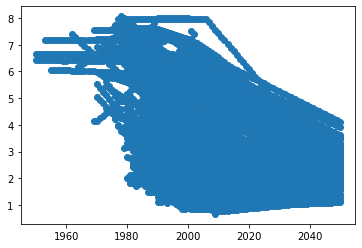

In [2]:
plt.scatter(df.year, df.total_fertility_rate)
plt.show()

In [4]:
#basic loss function; tells how much we are off from actual result
def loss_function (m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].year
        y = points.iloc[i].total_fertility_rate
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

The function above can be used to calculate the error 'manually', but will not be used in our ML optimization...

Below, m_now and b_now are current values; the L stands for learning rate, the smaller of which implies more steps, or a higher degree of precision (and may speak to the element of hyperparameters which were mentioned at some point...

In [16]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range (n):
        x = points.iloc[i].year
        y = points.iloc[i].total_fertility_rate
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

#m and b (can be) choesen at random; as stated above, a smaller L implies greater precision; epochs are iterations
m = 0
b = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
    m,b = gradient_descent(m, b, df, L)
    
print(m, b)
plt.scatter(df.year, df.total_fertility_rate, color = 'black')
plt.plot(list(range(1000, 3000)), [m * x + b for x in range(1000, 3000)], color='red')
plt.show()

Epoch: 0
-1.7510269474670982e+26 -8.681547385311934e+22


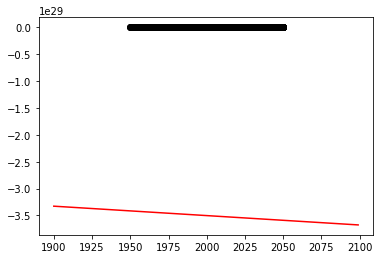

In [21]:
#m and b (can be) chosen at random; as stated above, a smaller L implies greater precision; epochs are iterations
m = 0
b = 0
L = 0.0001
epochs = 10

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m,b = gradient_descent(m, b, df, L)
    
print(m, b)
plt.scatter(df.year, df.total_fertility_rate, color = "black")
plt.plot(list(range(1900, 2100)), [m * x + b for x in range(1900, 2100)], color="red")
plt.show()

Not sure what occured above...

Trying a different method (from TEW22)

In [10]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
df = pd.read_csv('age_specific_fertility_rates.csv')

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [13]:
df.head()

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661


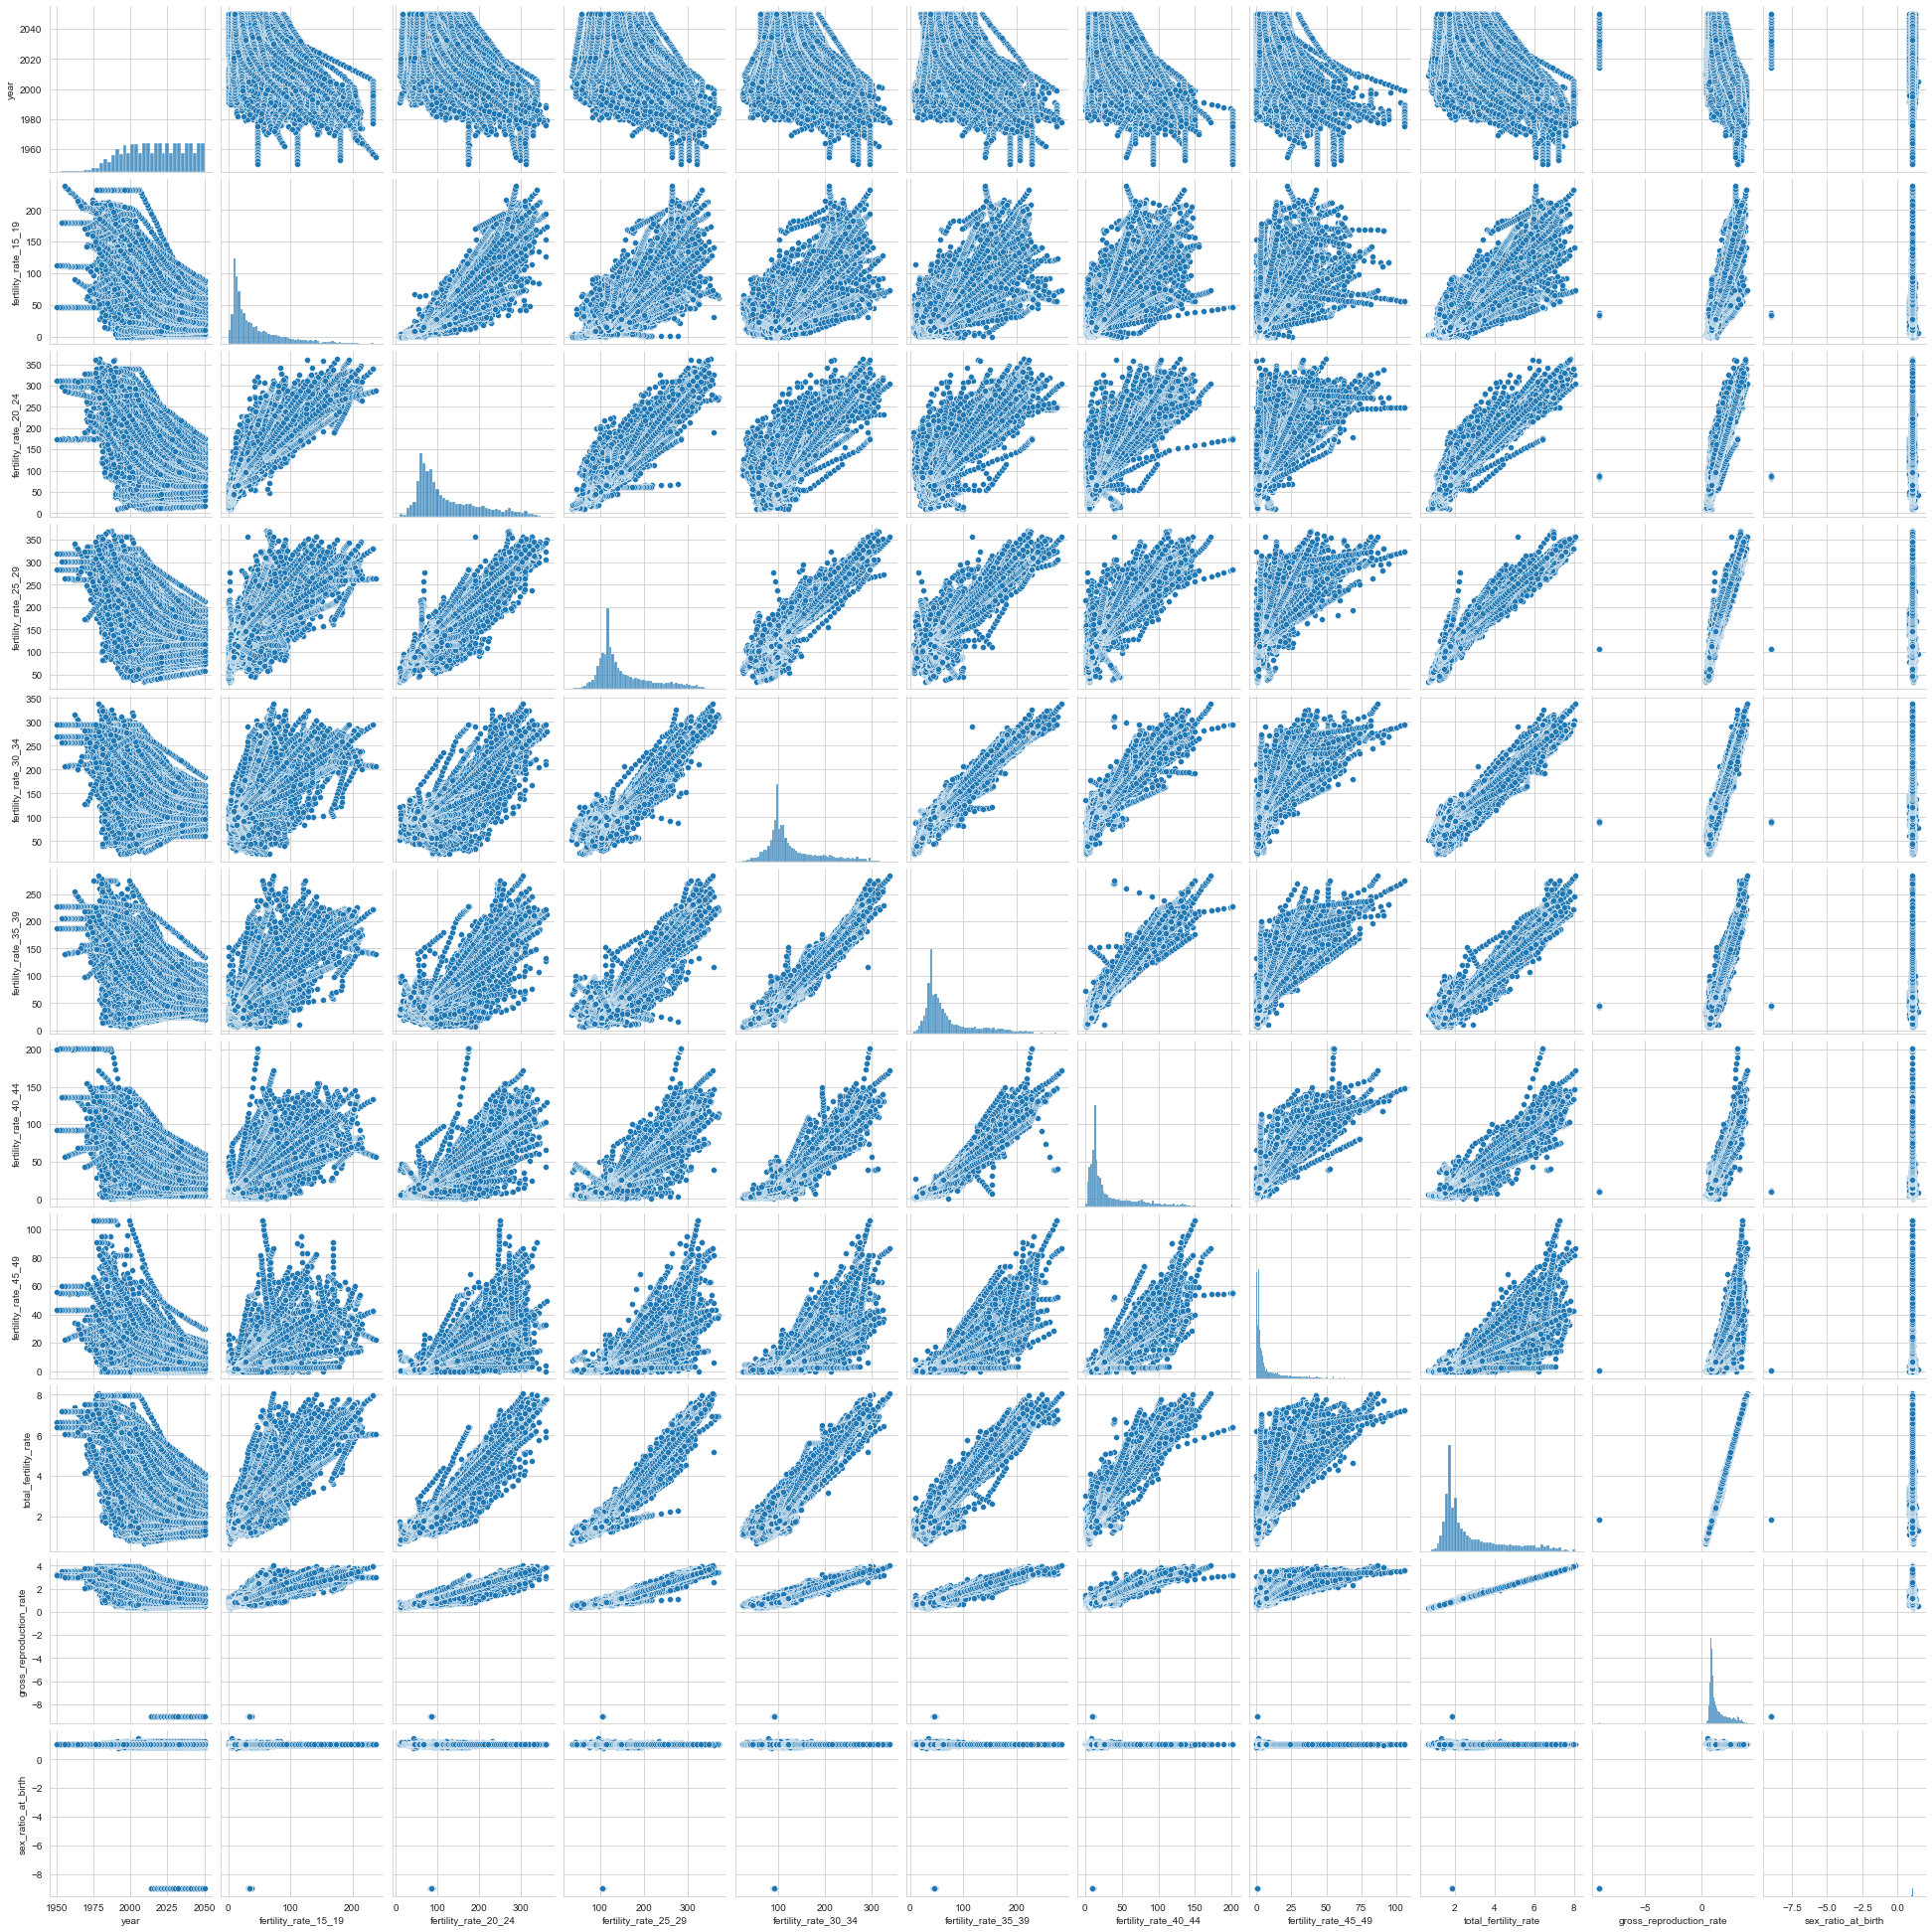

In [14]:
sb.pairplot(df)

In [15]:
df.corr()

,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
year,1.000000,-0.550112,-0.607784,-0.508518,-0.439336,-0.485687,-0.464056,-0.418081,-0.544777,-0.472694,-0.035967
fertility_rate_15_19,-0.550112,1.000000,0.903000,0.790561,0.737557,0.760753,0.742720,0.646532,0.870628,0.734597,-0.002287
fertility_rate_20_24,-0.607784,0.903000,1.000000,0.928418,0.836537,0.851371,0.825502,0.728985,0.951000,0.806993,0.012295
fertility_rate_25_29,-0.508518,0.790561,0.928418,1.000000,0.946940,0.923621,0.893781,0.790172,0.973344,0.832289,0.024495
fertility_rate_30_34,-0.439336,0.737557,0.836537,0.946940,1.000000,0.974973,0.930226,0.811754,0.956347,0.815611,0.018284
fertility_rate_35_39,-0.485687,0.760753,0.851371,0.923621,0.974973,1.000000,0.961706,0.854204,0.963342,0.819308,0.014366
fertility_rate_40_44,-0.464056,0.742720,0.825502,0.893781,0.930226,0.961706,1.000000,0.891316,0.940247,0.803389,0.019334
fertility_rate_45_49,-0.418081,0.646532,0.728985,0.790172,0.811754,0.854204,0.891316,1.000000,0.838637,0.716595,0.017652
total_fertility_rate,-0.544777,0.870628,0.951000,0.973344,0.956347,0.963342,0.940247,0.838637,1.000000,0.851033,0.015733
gross_reproduction_rate,-0.472694,0.734597,0.806993,0.832289,0.815611,0.819308,0.803389,0.716595,0.851033,1.000000,0.536637


In [18]:
#accessing the 0th, and 8th columns...
df_data = df.iloc[0:8].values
df_target = df.iloc[:,1].values

df_data_names = ['year', 'total_fertility_rate']
X, y = scale(df_data), df_target

ValueError: could not convert string to float: 'SI'

The cell above is not working (my data may not be compatible with the example given, but the seaborn plots are VERY interesting...